# There are other normalization layers available in PyTorch. Try them out and see what works best. Learn about why other normalization layers have been developed, and how they differ from batch normalization.

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [ ]:
def get_dls(bs=64):
    return DataBlock(
        blocks = (ImageBlock(cls = PILImageBW), CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter('training', 'testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    ).dataloaders(path, bs=bs)

dls = get_dls()

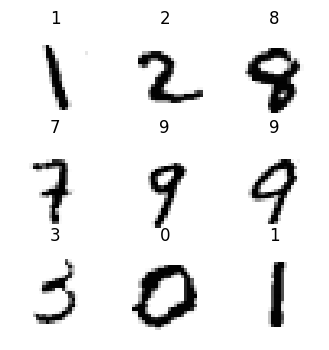

In [ ]:
dls.show_batch(max_n=9, figsize=(4,4))

In [ ]:
def simple_cnn():
    return sequential(
        conv(1, 8, ks=5),
        conv(8, 16),
        conv(16, 32),
        conv(32, 64),
        conv(64, 10, act=False),
        Flatten()
    )

In [ ]:
from fastai.callback.hook import *
def fit(epochs = 1, lr=0.06):
    learn = Learner(dls, simple_cnn(), loss_func=CrossEntropyLossFlat(),
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit_one_cycle(epochs, lr)
    return learn

**Description**<br>
`BatchNorm2d` for normalizing the activations of convolutional layers. It computes the mean and standard deviation of each feature map across a mini-batch of data and normalizes the activations accordingly. Additionally, BatchNorm2d introduces learnable parameters (weight and bias) that allow the network to adjust the normalized activations during training. 
During inference a running avg and std deviation is used.

In [ ]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    layers.append(nn.BatchNorm2d(nf))
    if act:
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)
learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,0.077343,0.042070,0.987500,01:06


**Description**<br>
`LazyBatchNorm2d` is a lightweight alternative to BatchNorm2d. Unlike `BatchNorm2d`, it does not have learnable parameters (such as weight and bias) and relies solely on input statistics for normalization.

**Benefits**<br>
*Memory Efficiency*: Since LazyBatchNorm2d does not require additional memory for learnable parameters, it is more memory-efficient compared to BatchNorm2d.<br>
*Simplified Implementation*: By avoiding the introduction of learnable parameters, LazyBatchNorm2d simplifies the implementation of neural network architectures, making it easier to manage and optimize.

In [ ]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    layers.append(nn.LazyBatchNorm2d(nf))
    if act:
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)
learn = fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.123093,0.125767,0.961300,01:12
1,0.083532,0.065134,0.978400,01:03
2,0.065157,0.044821,0.986500,01:10
3,0.037017,0.026919,0.990900,01:09
4,0.019780,0.023926,0.992500,01:03


In [ ]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    layers.append(nn.GroupNorm(2, nf))
    if act:
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)
learn = fit(5)

/home/sagar/git/fastai/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,0.212730,0.161088,0.962400,00:56
1,0.115773,0.103390,0.972900,00:49
2,0.085844,0.083206,0.978700,00:48
3,0.043874,0.052968,0.986100,01:09
4,0.026673,0.039631,0.989300,00:43


In [ ]:
learn.model.ipu??

Signature: learn.model.ipu(device: Union[int, torch.device, NoneType] = None) -> ~T
Source:   
    def ipu(self: T, device: Optional[Union[int, device]] = None) -> T:
        r"""Move all model parameters and buffers to the IPU.

        This also makes associated parameters and buffers different objects. So
        it should be called before constructing optimizer if the module will
        live on IPU while being optimized.

        .. note::
            This method modifies the module in-place.

        Arguments:
            device (int, optional): if specified, all parameters will be
                copied to that device

        Returns:
            Module: self
        """
        return self._apply(lambda t: t.ipu(device))
File:      ~/miniconda3/lib/python3.12/site-packages/torch/nn/modules/module.py
Type:      method